# Unsupervised learning - Clustering

## KMeans clustering failures and finding k

Follow:
- _Introduction to Machine Learning_ [Chapter 3](https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb) **Section 3.5.1 k-Means Clustering**
- _Practical Statistics for Data Scientists_ [Chapter 7](https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%207%20-%20Unsupervised%20Learning.ipynb) Selecting the number of clusters 
- _Introduction to Machine Learning_ [Chapter 3](https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb) **Section 3.5.4 Comparing and Evaluating Clustering Algorithms** 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import mglearn

## Failures of k-means

> k-means also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. 

code from Introduction to Machine Learning with Python Chapter 3.5.1:[K-means Clustering](https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb)

Text(0, 0.5, 'Feature 1')

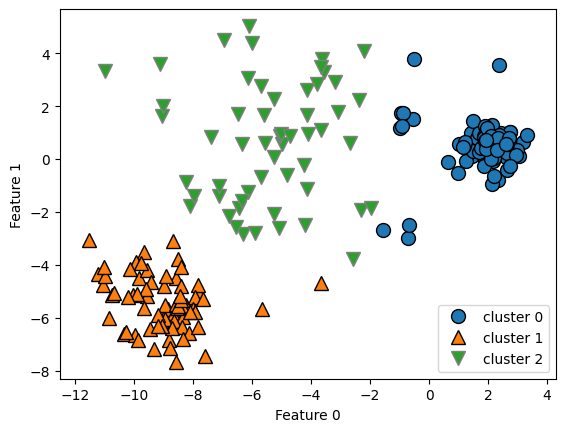

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

>One might have expected the dense region in the lower left to be the first cluster, the dense region in the upper right to be the second, and the less dense region in the center to be the third. Instead, both cluster 0 and cluster 1 have some points that are far away from all the other points in these clusters that “reach” toward the center.

Text(0, 0.5, 'Feature 1')

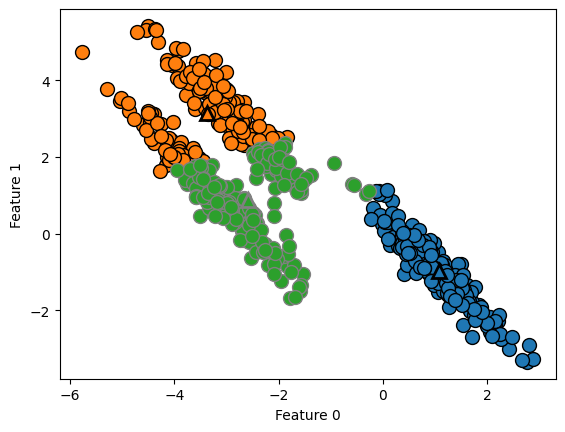

In [4]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

> k-means also assumes that all directions are equally important for each cluster. The above plot shows a two-dimensional dataset where there are three clearly separated parts in the data. However, these groups are stretched toward the diagonal. As k-means only considers the distance to the nearest cluster center, it can’t handle this kind of data:

Text(0, 0.5, 'Feature 1')

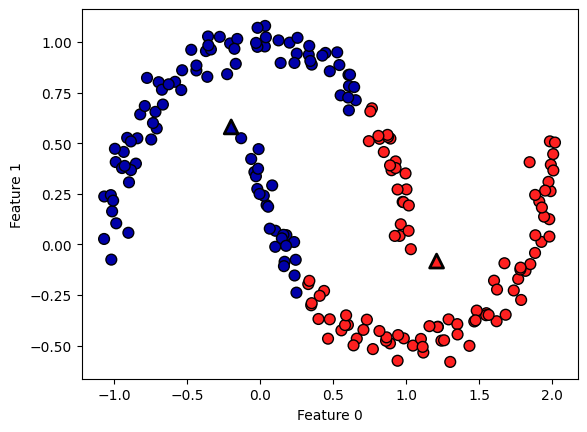

In [5]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

>Here, we would hope that the clustering algorithm can discover the two half-moon shapes. However, this is not possible using the k-means algorithm.

## How many clusters?

**Elbow method:** Find point with maximum curverature in the score plot.

Different scores:
1. Distortion: The sum of squared distances from each point to its assigned center
2. [Silhouette](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient): Mean Silhouette Coefficient of all samples  
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
3. [Calinski-Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index): The ratio of dispersion between and within clusters (higher is better)

These scores can also be used to compare clustering algorithms. However, each score will favour different types of clustering algorithms. See advantages and disadvantages in the scikit-learn documentation of the scores.

**Important:** Often, the number of clusters is chosen based on the application area, prior knowledge, or business goals.

Text(0, 0.5, 'Feature 1')

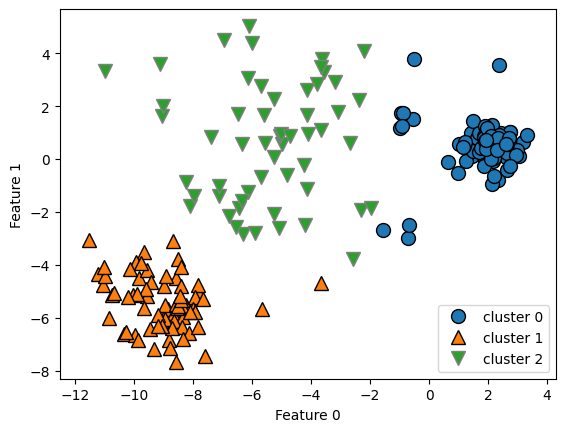

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature
            0")
plt.ylabel("Feature 1")

### Distortion (`kmeans.inertia_`)
code from Practical Statistics for Data Scientists [Unsupervised Learning](https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%207%20-%20Unsupervised%20Learning.ipynb)

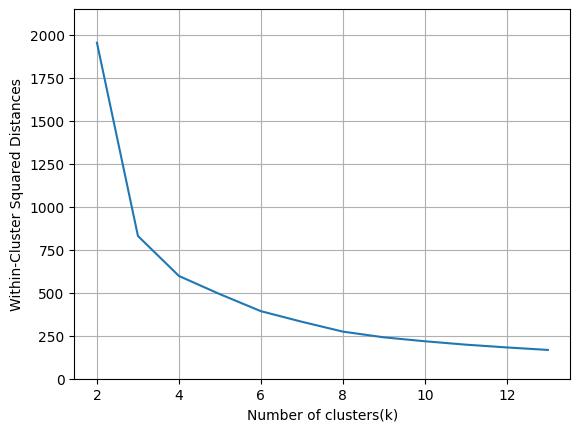

In [7]:
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X_varied)
    inertia.append(kmeans.inertia_ )
    
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)

### Silhouette

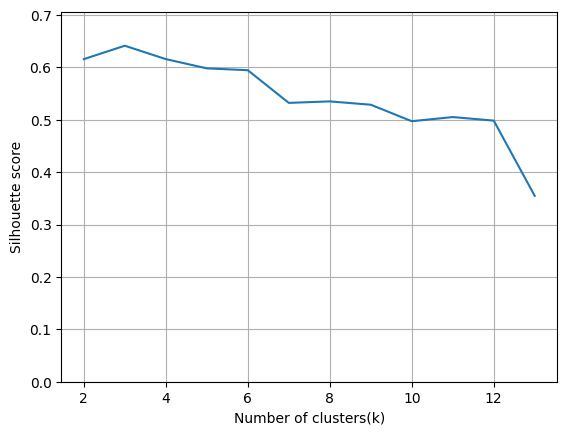

In [8]:
from sklearn.metrics import silhouette_score

sils = []
n_clusters_list = range(2, 14)

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_varied)
    sils.append(silhouette_score(X_varied, kmeans.labels_ ))

    
df_sils = pd.DataFrame({'n_clusters': n_clusters_list, 'silhouette': sils})
ax = df_sils.plot(x='n_clusters', y='silhouette')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette score')
plt.ylim((0, 1.1 * df_sils.silhouette.max()))
plt.grid(True)
ax.legend().set_visible(False)

### Calinski-Harabasz

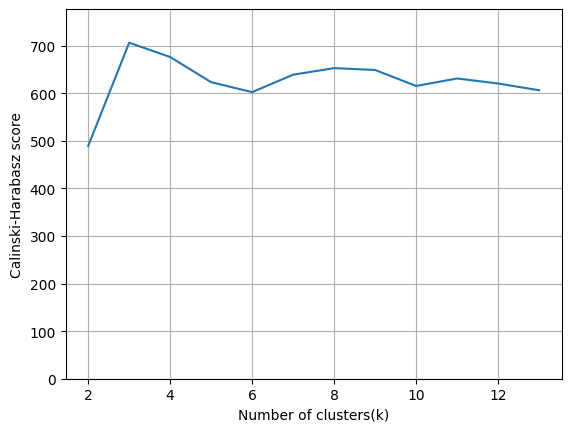

In [9]:
from sklearn.metrics import calinski_harabasz_score

chs = []
n_clusters_list = range(2, 14)

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_varied)
    chs.append(calinski_harabasz_score(X_varied, kmeans.labels_ ))

    
df_chs = pd.DataFrame({'n_clusters': n_clusters_list, 'calinski_harabasz': chs})
ax = df_chs.plot(x='n_clusters', y='calinski_harabasz')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Calinski-Harabasz score')
plt.ylim((0, 1.1 * df_chs.calinski_harabasz.max()))
plt.grid(True)
ax.legend().set_visible(False)

### Find Elbow using yellowbrick
See yellowbrick documentation for [Elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#) for more details

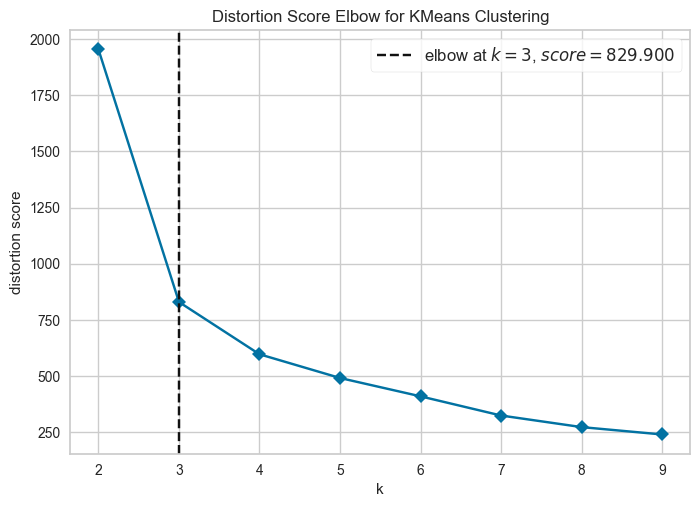

In [10]:
from yellowbrick.cluster.elbow import kelbow_visualizer
ke=kelbow_visualizer(KMeans(random_state=4, n_init=10), X_varied, k=(2,10), 
                  metric='distortion',
                 timings=False)

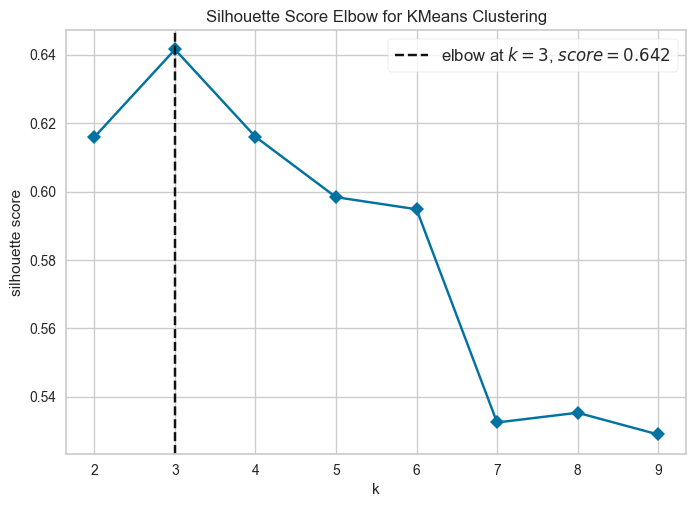

In [11]:
from yellowbrick.cluster.elbow import kelbow_visualizer
ke=kelbow_visualizer(KMeans(random_state=4, n_init=10), X_varied, k=(2,10), 
                  metric='silhouette',
                 timings=False)

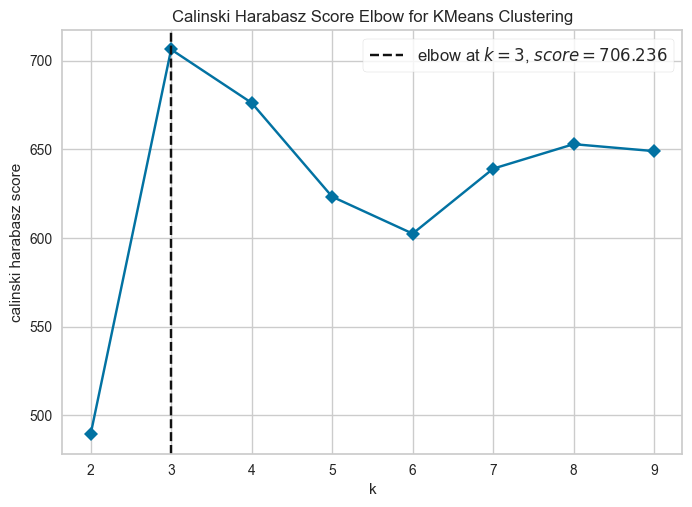

In [12]:
from yellowbrick.cluster.elbow import kelbow_visualizer
ke=kelbow_visualizer(KMeans(random_state=4, n_init=10), X_varied, k=(2,10), 
                  metric='calinski_harabasz',
                 timings=False)

## Finding k for the Wine dataset

Using these curves to find the optimal k for the wine dataset.

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_wine

df, _ = load_wine(return_X_y=True, as_frame=True)
df_scaled = StandardScaler().fit_transform(df)

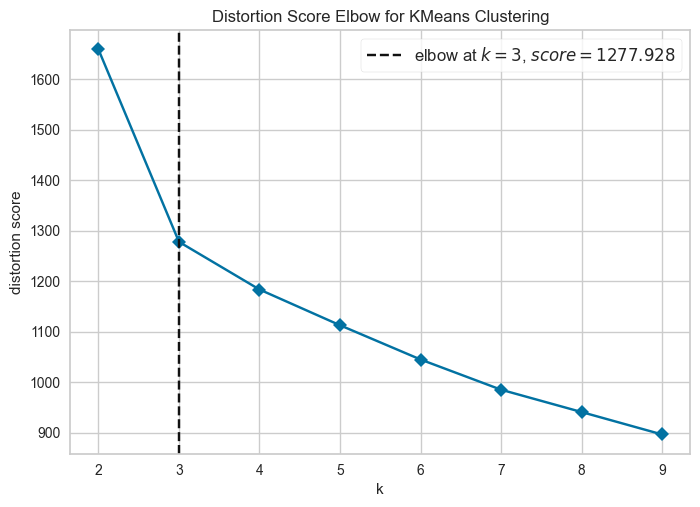

In [14]:
from yellowbrick.cluster.elbow import kelbow_visualizer
ke=kelbow_visualizer(KMeans(random_state=54, n_init=10), df_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

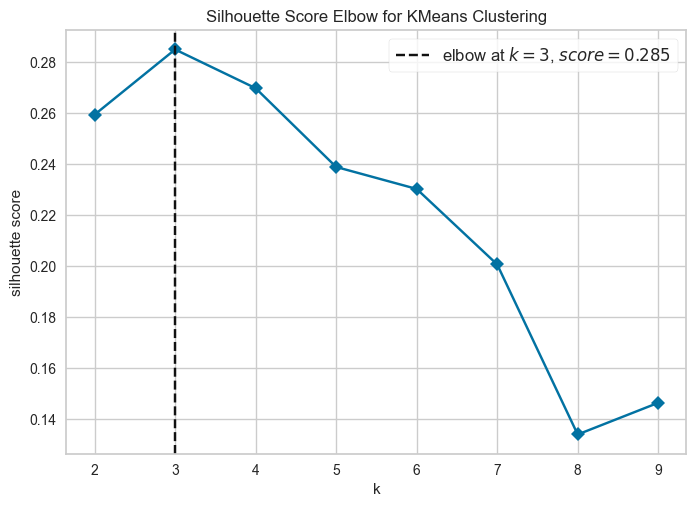

In [15]:
from yellowbrick.cluster.elbow import kelbow_visualizer
ke=kelbow_visualizer(KMeans(random_state=54, n_init=10), df_scaled, k=(2,10), 
                  metric='silhouette',
                 timings=False)

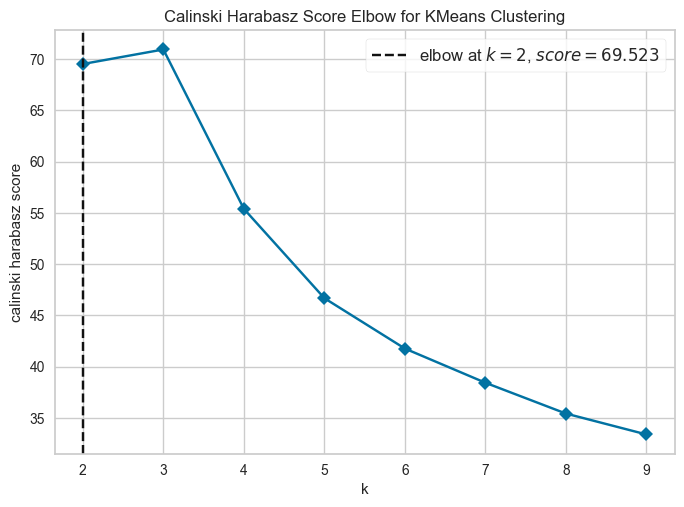

In [16]:
from yellowbrick.cluster.elbow import kelbow_visualizer
ke=kelbow_visualizer(KMeans(random_state=54, n_init=10), df_scaled, k=(2,10), 
                  metric='calinski_harabasz',
                 timings=False)

### Summary

- k=3 for Distortion and Silhouette 
- k=2 for calinski_harabasz. Note that maximum occurs at k=3

We know, that there are 3 groups in the wine dataset